## About this tutorial 

In my post about [the 1-neuron network: logistic regression](https://thedatafrog.com/logistic-regression/), we have built  a very simple neural network with only one neuron to classify a 1D sample in two categories, and we saw that this network is equivalent to a logistic regression. We also learnt about the sigmoid activation function. 

Today, we're going to perform the same exercise in 2D, and you will learn that: 

* the logistic regression can work in 2D (or more dimensions) as well, depending on the problem;
* the logistic regression is **a linear algorithm**;
* it is often necessary to add **non-linearities**, and thus to go beyond the logistic regression. 

**Prerequisites**

Before following this tutorial, you should:

* know about the 1D linear regression, or follow [this tutorial](https://thedatafrog.com/logistic-regression)
* [install Anaconda](https://thedatafrog.com/install-anaconda-data-science-python/), if not already done.

As usual, first download and open this notebook:

* [download the repository containing this notebook](https://github.com/cbernet/maldives/archive/master.zip)
* unzip it, say to `Downloads/maldives-master`
* launch a jupyter notebook from the anaconda navigator
* in the notebook, navigate to `Downloads/maldives-master/one_neuron`
* open `logistic_regression_2d.ipynb`

In the notebook, import the needed packages:

In [8]:
import numpy as np
normal = np.random.multivariate_normal

In [9]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset creation

Let's create a sample of examples with two values x1 and x2, with two categories. 
For category 0, the underlying probability distribution is a 2D Gaussian centered on (0,0), with width sqrt(s2) = 1 along both directions. For category 1, the Gaussian is centered on (2,2).

In [10]:
s2 = 1
sample0 = normal([0.,0.], [[s2, 0.], [0.,s2]], 100)
sample1 = normal([2.,2.], [[s2, 0.], [0.,s2]], 100)
target0 = np.zeros((100,))
target1 = np.ones((100,))

Here is a scatter plot for the examples in the two categories

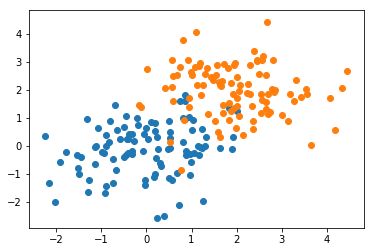

In [11]:
plt.scatter(sample0[:,0], sample0[:,1])
plt.scatter(sample1[:,0], sample1[:,1])

Our goal will be to classify (x,y) points in one of the two categories. To do that, we need to build a single sample containing the examples from the two categories. So we concatenate the arrays of points, and also the arrays of targets for later use:

In [12]:
x = np.concatenate((sample0, sample1))
y = np.concatenate((target0, target1))

## The 2D sigmoid function 

The sigmoid or logistic function is essential in binary classification problem. It is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like in 1D:

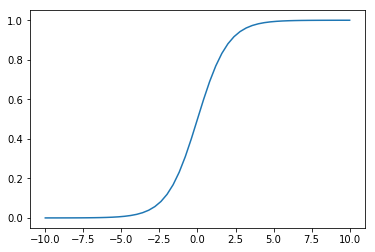

In [14]:
# define parameters
b = 0
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))

In 2D, the expression of the sigmoid remains the same, but $z$ is now a function of the two variables $x_1$ and $x_2$, 

$$z=w_1 x_1 + w_2 x_2 + b$$

And here is what the sigmoid looks like in the $(x_1, x_2)$ plane:

Text(0,0.5,'x2')

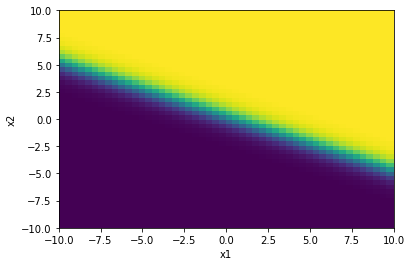

In [25]:
# define parameters
b = 0
w1 = 1
w2 = 2 

def sigmoid_2d(x1, x2):
    # z is a linear function of x1
    z = w1*x1 + w2*x2 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
xmin, xmax, npoints = (-10,10,51)
gridx, gridy = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
plt.pcolor(gridx, gridy, sigmoid_2d(gridx,gridy))
plt.xlabel('x1')
plt.ylabel('x2')

The 2D sigmoid has the same kind of rising edge as the 1D sigmoid, but in 2D. 
With the parameters defined above: 

* The weight of $x_2$ is twice larger than the weight of $x_1$, so the sigmoid evolves twice faster as a function of $x_2$.
* The separation boundary, which occurs for $z=0$, is a straight line with equation $w_1 x_1 + w_2 x_2 + b = 0$ or equivalently: 

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} = -0.5 x_1$$


## Logistic regression

Let's now perform a logistic regression in 2D to separate the two classes of samples. 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x, y)

In [33]:
xmin, xmax, npoints = -6, 6, 100
gridx, gridy = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
grid = np.c_[gridx.ravel(), gridy.ravel()]

In [35]:
prob = clf.predict_proba(grid)

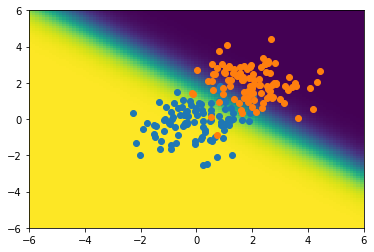

In [36]:
plt.pcolor(gridx,gridy,prob[:,0].reshape(npoints,npoints))
plt.scatter(sample0[:,0], sample0[:,1])
plt.scatter(sample1[:,0], sample1[:,1])

The logistic regression is able to separate these two classes well. 

But what about more complicated sample distributions? 

## A non linear problem 

Let's build a more complicated sample:

In [49]:
x1 = np.random.uniform(-1, 1, 400)
x2 = np.random.uniform(-1, 1, 400)

In [50]:
samples = np.column_stack((x1, x2))
sample0 = samples[x1*x2>0]
sample1 = samples[x1*x2<0]

Text(0,0.5,'x2')

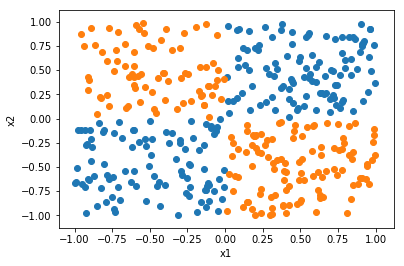

In [94]:
plt.scatter(sample0[:,0],sample0[:,1])
plt.scatter(sample1[:,0],sample1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Obviously, we cannot draw a line separating these two samples, and the logistic regression is going to be of no use. 

**This is a non-linear problem**. 

To be able to deal with non-linearities, the classification boundary must be a non-linear function of the inputs $x_1$ and $x_2$. This means that the weighted input of the last sigmoid neuron must be a non-linear function of these variables. 

To do that, we have two solutions: 

1. changing variables, which requires some insights of what the dataset looks like
1. using a more complex model, like a neural network with one or more hidden layers. 

## Changing variables

We're first going to try and change variables. Looking at the plot above, we see that the distribution of the samples is done according to the product $x_1 x_2$.

Indeed, For the first sample, ($x_1 > 0$ and $x_2 > 0$), or ($x_1 < 0$ and $x_2 < 0$). So the product $x_1 x_2$ is always positive. For the second sample, it's always negative. 

So instead of considering $x_1$ and $x_2$ separately, we will work with $u = x_1 x_2$. 

We build the samples as a function of $u$:

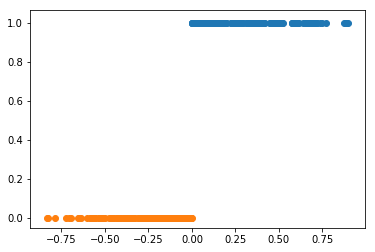

In [139]:
u0 = sample0[:,0] * sample0[:,1]
u1 = sample1[:,0] * sample1[:,1]
y0 = np.ones(len(u0))
y1 = np.zeros(len(u1))
plt.scatter(u0, y0)
plt.scatter(u1, y1)

And we can do a simple logistic regression: 

In [140]:
x = np.concatenate((u0, u1))
x = np.c_[x]
y = np.concatenate((y0, y1))
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(x, y)

We first plot the results as a function of u: 

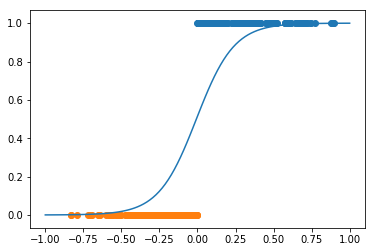

In [141]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = clf.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.scatter(u0, y0)
plt.scatter(u1, y1)

And now, we plot the result a function of $x1$ and $x2$

In [144]:
xmin, xmax, npoints = -1, 1, 100
gridx, gridy = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
gridu = gridx * gridy
us = np.c_[uspace.flatten()]
probs = clf.predict_proba(us)
probs[:,1].shape

(10000,)

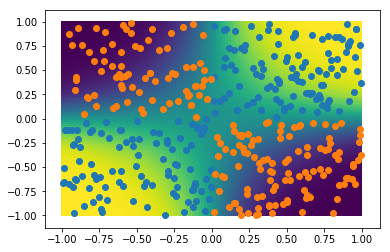

In [145]:
plt.pcolor(gridx, gridy, probs[:,1].reshape(npoints,npoints))
plt.scatter(sample0[:,0], sample0[:,1])
plt.scatter(sample1[:,0], sample1[:,1])

This works in this simple case, but: 

* the relation between the two variables can be very complicated, and difficult to infer
* this becomes a nightmare when working in more than two dimensions...

The solution is to make a more complex model, able to adapt to such non-linearities all by itself. 

## Neural networks with hidden layers: a non-linear classifier 

We're going to buid a simple neural network with a single hidden layers with 10 neurons (remember: always start simple). 

For these neurons, we use a ReLU activation function, which almost always works well.
You can try and replace it with a logistic (sigmoid) activation later on if you want. 

In [211]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', alpha=1e-4,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

mlp.fit(x,y)

Iteration 1, loss = 0.69955820
Iteration 2, loss = 0.63977156
Iteration 3, loss = 0.60536046
Iteration 4, loss = 0.56986051
Iteration 5, loss = 0.52573969
Iteration 6, loss = 0.48391111
Iteration 7, loss = 0.44638821
Iteration 8, loss = 0.40818126
Iteration 9, loss = 0.37046082
Iteration 10, loss = 0.33397852
Iteration 11, loss = 0.29763007
Iteration 12, loss = 0.26286892
Iteration 13, loss = 0.22853328
Iteration 14, loss = 0.19782385
Iteration 15, loss = 0.16955532
Iteration 16, loss = 0.14529448
Iteration 17, loss = 0.12440173
Iteration 18, loss = 0.10876436
Iteration 19, loss = 0.09780275
Iteration 20, loss = 0.08667825
Iteration 21, loss = 0.08024256
Iteration 22, loss = 0.07497204
Iteration 23, loss = 0.07028556
Iteration 24, loss = 0.06611100
Iteration 25, loss = 0.06340387
Iteration 26, loss = 0.05975164
Iteration 27, loss = 0.05632828
Iteration 28, loss = 0.05434881
Iteration 29, loss = 0.05225860
Iteration 30, loss = 0.05009863
Iteration 31, loss = 0.04736596
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

To evaluate the performance of the network, we need to build a test sample, just like we did for the training sample:

In [213]:
x1 = np.random.uniform(-1, 1, 400)
x2 = np.random.uniform(-1, 1, 400)
test = np.column_stack((x1, x2))
xt0 = test[x1*x2>0]
xt1 = test[x1*x2<0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0,xt1))]
yt = np.concatenate((yt0,yt1))

In [209]:
from sklearn.metrics import accuracy_score
predictions = mlp.predict(xt)
accuracy_score(yt, predictions)

0.995

The performance seems looks excellent! Let's plot the classification probability in 2D, together with the test sample:

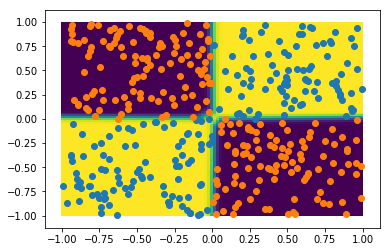

In [210]:
probs = mlp.predict_proba(grid)
plt.pcolor(gridx, gridy, probs[:,1].reshape(npoints,npoints))
plt.scatter(xt0[:,0], xt0[:,1])
plt.scatter(xt1[:,0], xt1[:,1])